In [ ]:
import numpy as np
import pandas as pd
from time import time
import os
from PIL import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn import svm
import glob
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test_0 = np.load("/content/sample_data/test_0.npy")
test_1 = np.load("/content/sample_data/test_1.npy")
train_0 = np.load("/content/sample_data/train_0.npy")
train_1 = np.load("/content/sample_data/train_1.npy")
val_0 = np.load("/content/sample_data/val_0.npy")
val_1 = np.load("/content/sample_data/val_1.npy")

In [ ]:
tsne = TSNE(n_components=3, learning_rate=100)

(1341, 200, 200)

In [ ]:
y_label = np.zeros(1341)
y_label1 = np.ones(3875)
y_label=np.concatenate((y_label,y_label1),axis=0)

In [ ]:
y_label2 = np.zeros(234)
for i in range(234):
  y_label2[i] = 2
y_label3 = np.zeros(390)
for i in range(390):
  y_label3[i] = 3
y_label=np.concatenate((y_label,y_label2),axis=0)#test0
y_label=np.concatenate((y_label,y_label3),axis=0)#test1

In [ ]:
train = np.concatenate((train_0,train_1),axis=0)
train = np.concatenate((train,test_0),axis=0)
train = np.concatenate((train,test_1),axis=0)

In [ ]:
train_data_2 = np.reshape(train,(-1,40000))

In [ ]:
train_tsne = tsne.fit_transform(train_data_2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#test0 = 234 test1 = 390 train0 = 1341 train1 = 3875
train0 = train_tsne[0:1341]
train1 = train_tsne[1341:5216]
test0 = train_tsne[5216:5450]
test1 = train_tsne[5450:5840]
label1 = y_label[0:1341]
label2 = y_label[1341:5216]
label3 = y_label[5216:5450]
label4 = y_label[5450:5840]

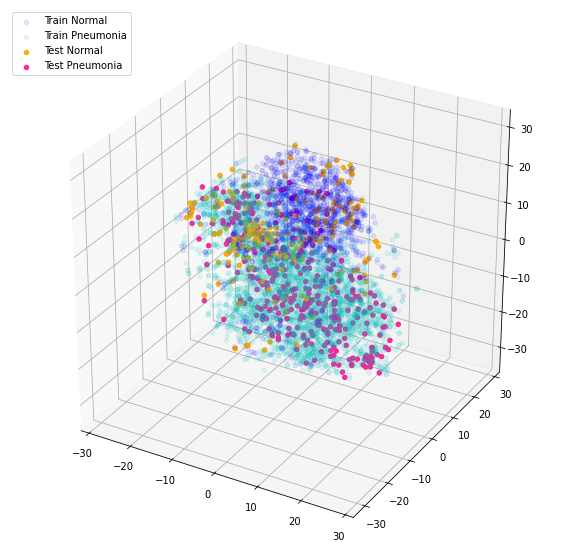

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(train0[:,0], train0[:,1],train0[:,2],alpha=0.1,label='Train Normal',c='b' )
ax.scatter(train1[:,0], train1[:,1],train1[:,2],alpha=0.1,label='Train Pneumonia',c='c' )
ax.scatter(test0[:,0], test0[:,1],test0[:,2],alpha=0.9,label='Test Normal',c='orange' )
ax.scatter(test1[:,0], test1[:,1],test1[:,2],alpha=0.9,label='Test Pneumonia',c='deeppink' )
ax.legend(loc='upper left')
string = "T-sne"

In [ ]:
tsne2 = TSNE(n_components=2, learning_rate=100)
train_tsne2 = tsne2.fit_transform(train_data_2)

In [ ]:
train00 = train_tsne2[0:1341]
train11 = train_tsne2[1341:5216]
test00 = train_tsne2[5216:5450]
test11 = train_tsne2[5450:5840]

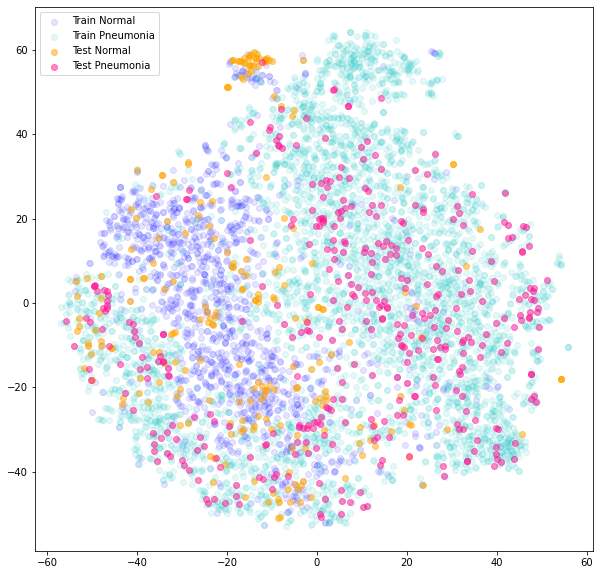

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train00[:,0], train00[:,1],alpha=0.1,label='Train Normal',c='b' )
plt.scatter(train11[:,0], train11[:,1],alpha=0.1,label='Train Pneumonia',c='c' )
plt.scatter(test00[:,0], test00[:,1],alpha=0.5,label='Test Normal',c='orange' )
plt.scatter(test11[:,0], test11[:,1],alpha=0.5,label='Test Pneumonia',c='deeppink' )
plt.legend(loc='upper left')
string = "T-sne"